In [ ]:
!pip install finance-datareader

In [ ]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.1 MB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr
from pykrx import stock
import pandas_datareader.data as pdr
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
ticker = yf.Ticker("MSFT")

In [ ]:
ticker.info
# longBusinessSummary를 통해서 cosine유사도 하면.. 설명이 얼마나 유사한가 > 얼마나 비슷한 사업을 영위하는가? 판단할 수 있지않을까?

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. The Int

# 간단한 라이브러리 사용법들

In [ ]:
df = stock.get_market_price_change("20180301", "20180320")
print(df.head(2))

           종목명     시가     종가   변동폭    등락률      거래량         거래대금
티커                                                             
095570  AJ네트웍스   7550   7130  -420  -5.56   384948   2844218890
068400   AJ렌터카  10900  12100  1200  11.01  3410074  40045884150


In [ ]:
df = stock.get_market_fundamental("20210104", market="KOSPI")
print(df.head(2))

          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.66  0.67   982  6.55  300
006840  62448  11.65  0.40  2168  2.97  750


In [ ]:
df = stock.get_market_net_purchases_of_equities("20210115", "20210122", "KOSPI", "개인")
print(df.head())
# 금융투자 / 보험 / 투신 / 사모 / 은행 / 기타금융 / 연기금 / 기관합계 / 기타법인 / 개인 / 외국인 / 기타외국인 / 전체

            종목명     매도거래량      매수거래량    순매수거래량         매도거래대금         매수거래대금  \
티커                                                                             
005930     삼성전자  79567418  102852747  23285329  6918846810800  8972911580500   
000270      기아차  44440252   49880626   5440374  3861283906400  4377698855000   
005935    삼성전자우  15849762   20011325   4161563  1207133611400  1528694164400   
051910     LG화학    709872     921975    212103   700823533000   908593419000   
096770  SK이노베이션   4848359    5515777    667418  1298854139000  1478890602000   

              순매수거래대금  
티커                     
005930  2054064769700  
000270   516414948600  
005935   321560553000  
051910   207769886000  
096770   180036463000  


In [ ]:
# 종목별 공매도 잔고 현황
df = stock.get_shorting_balance_by_date("20190401", "20190405", "005930")
print(df.head())

              공매도잔고       상장주식수         공매도금액          시가총액    비중
날짜                                                               
2019-04-01  3403293  5969782550  153318349650  2.689387e+14  0.06
2019-04-02  3435390  5969782550  157169092500  2.731176e+14  0.06
2019-04-03  3380137  5969782550  157514384200  2.781919e+14  0.06
2019-04-04  3419184  5969782550  160530688800  2.802813e+14  0.06
2019-04-05  3421622  5969782550  160302990700  2.796843e+14  0.06


In [ ]:
# 공매도 상위 50
df = stock.get_shorting_volume_top50("20210129")
print(df.head())

        순위   공매도거래대금      총거래대금  공매도비중  직전40일거래대금평균  공매도거래대금증가율  직전40일공매도평균비중  \
티커                                                                              
003545   1  38510030  915824030   4.21      5814411        6.62          0.51   
267290   2  13265200  329805000   4.02      2755259        4.82          0.66   
015890   3  15865860  428852660   3.70      8316412        1.91          1.30   
005945   4  25401240  908915950   2.79      4610634        5.51          0.44   
227840   5  13784400  546597900   2.52      3084294        4.47          0.51   

        공매도비중증가율  주가수익률  
티커                       
003545      8.33  -1.25  
267290      6.14  -2.46  
015890      2.85  -4.46  
005945      6.40  -0.35  
227840      4.91  -2.37  


In [ ]:
stocks = fdr.StockListing('KOSPI') # 코스피, 코스닥, 코넥스 전체
stocks

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68000,2,-900,-1.31,68300,68500,67800,10227311,695338333628,405945213400000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,556000,1,3000,0.54,549000,560000,543000,344272,190480536000,130104000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,118500,3,0,0.00,117400,118500,115100,2622604,306466245506,86268280252500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,802000,1,4000,0.50,791000,802000,790000,40482,32306551000,57081548000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,598000,1,1000,0.17,590000,611000,589000,1034234,620495599000,50573595540000,84571230,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,014915,KR7014911002,성문전자우,KOSPI,,5660,2,-230,-3.90,5890,5890,5640,563,3238900,3396000000,600000,STK
946,000227,KR7000222000,유유제약2우B,KOSPI,,10350,2,-340,-3.18,10500,10500,10020,5214,52615710,3369546000,325560,STK
947,002787,KR7002782001,진흥기업2우B,KOSPI,,11140,1,50,0.45,11050,11140,11030,860,9526420,3284161120,294808,STK
948,001527,KR7001522002,동양2우B,KOSPI,,10480,2,-410,-3.76,11000,11000,10410,806,8439240,3233803120,308569,STK


In [ ]:
ticker = yf.Ticker('005930.KS')

In [ ]:
ticker.info

{'address1': '129 Samsung-Ro',
 'address2': 'Maetan-3dong Yeongtong-gu',
 'city': 'Suwon-si',
 'zip': '443-742',
 'country': 'South Korea',
 'phone': '82 2 2255 0114',
 'fax': '82 3 1200 7538',
 'website': 'https://www.samsung.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Samsung Electronics Co., Ltd. engages in the consumer electronics, information technology and mobile communications, and device solutions businesses worldwide. The company offers smartphones, tablets, watches, and accessories; TVs, projectors, and sound devices; home appliances, including refrigerators, washing machines and dryers, vacuum cleaners, cooking appliances, dishwashers, air conditioners, and air purifiers; monitors, and memory and storage products; displays, and smart and LED signages; and other accessories. It also engages in technology, venture capital investments, cloud services, network d

In [ ]:
ticker.info['marketCap']

452548859265024

# Feature로 사용할 데이터 정리

In [ ]:
info_columns_mapper = {
    # 정보 관련
    # 'sector': '섹터',
    # 'industry': '산업군',
    'recommendationKey': '종합매수의견',

    # 매매 정보 관련
    'sharesOutstanding': '발행주식수',
    'averageVolume10days': '종목평균거래량(10일)',
    'averageVolume': '종목평균거래량',
    'heldPercentInstitutions': '기관보유비율',
    'shortRatio': '일일공매도비율',
    'sharesPercentSharesOut': '발행주식대비공매도비율',
    'shortPercentOfFloat': '유동주식중공매도비율',

    # 가격 관련
    'marketCap': '시가총액',  # 200B:mega // 10B~200B:large // 2B-10B:medium // 300M~2B:small // 50M~300M:micro // ~50M:nano
    'currentPrice': '현재가',
    'fiftyDayAverage': '50일평균가',
    'twoHundredDayAverage': '200일평균가',
    'fiftyTwoWeekHigh': '52주최고가',
    'fiftyTwoWeekLow': '52주최저가',
    'SandP52WeekChange': 'S&P_52주변동성',
    '52WeekChange': '52주변동성',
    'ytdReturn': '연초대비수익률',
    'fiveYearAverageReturn': '5년연평균수익률',  # 5년연평균수익률
    'beta': '베타값',  # 5년 데이터, 개별주식의 변동률을 의미. 1에 가까울수록 시장과 가깝고, 1을 넘어가면 시장 대비 고변동, 0으로 가까우면 시장 대비 저변동 주식을 의미함.

    # 현금 창출, 매출 관련 (ttm)
    'totalRevenue': '총매출액',
    'grossProfits': '매출총이익',  # 매출이익(매출액 - 매출원가)
    'revenuePerShare': '주당매출액',
    'ebitda': 'EBITDA',  # 감가상각 등의 부가비용을 차감하기 전의 금액, 영업 활동을 통한 현금 창출 능력. 유형자산의 가치까지 포함하는 지표
    'ebitdaMargins': 'EBITDA마진',  # 유형자산의 유지비용을 고려한 기업의 현금 창출 능력

    # 재무 상태 관련 (mrq)
    'debtToEquity': '부채자본비율',
    'operatingCashflow': '영업현금흐름',  # 영업현금흐름 : 영업이익 - 법인세 - 이자비용 + 감가상각비
    'freeCashflow': '잉여현금흐름',  # 기업의 본원적 영업활동을 위해 현금을 창출하고, 영업자산에 투자하고도 남은 현금
    'totalCashPerShare': '주당현금흐름',
    'currentRatio': '유동비율',  # 회사가 가지고 있는 단기 부채 상환 능력
    'quickRatio': '당좌비율',  # 회사가 가지고 있는 단기 부채 상환 능력


    # 경영 효율 관련
    'returnOnAssets': '자기자본이익률',  # mrq : 간단히 말해, 얼마를 투자해서 얼마를 벌었냐
    'returnOnEquity': '총자산순이익률',  # mrq : ROE와 비교하여 기업이 가지고 있는 부채의 비중을 볼 때
    'grossMargins': '매출총이익률',  # ttm : 매출이익(매출액 - 매출원가) / 매출액 : 매출이익률, Gross Profit Margin (GPM)
    'operatingMargins': '영업이익률',  # ttm : 매출총이익 - 판관비 - 감가상각비
    'profitMargins': '순이익률',  # ttm : Net Income(순이익) / Revenue(총수익) : 순이익률, Net Profit Margin (NPM)

    # 기업 자산 관련
    'totalCash': '총현금액',
    'totalDebt': '총부채액',

    # 기업 가치 관련
    'priceToBook': 'PBR',  # 기업이 가진 순 자산에 비해 주가가 얼마나 비싼지
    'enterpriseValue': '기업가치',  # 기업가치 : 시가총액 + (총차입금 - 현금성 자산)
    'enterpriseToRevenue': 'EV/R',  # 매출액대비 기업가치 비율
    'enterpriseToEbitda': 'EV/EBITDA',  # EBITDA대비 기업가치 비율 : PER과 의미적으로 비슷한 지표
    'forwardEps': '선행1년EPS',  # 주당순이익, 보통 5년동안의 EPS를 관찰해서 추이를 봄
    'trailingEps': '1년EPS',  # 주당순이익 = 당기순이익 / 유통주식수
    'priceToSalesTrailing12Months': '1년PSR',  # 주가매출액비율 (1년 기준)
    'forwardPE': '선행1년PER',  # 향후 1년동안 예상되는 PER
    'trailingPE': '1년PER',  # 현재 PER. 기업이 한 주당 벌어들이는 순이익에 비해, 실제 주가가 몇 배가 되는 지 나타내는 지표. 고평가 저평가에 사용

    # 배당 관련
    'dividendYield': '배당수익률',  # 현재 기준 배당 수익률
    'payoutRatio': '배당성향',  # 20 ~ 60% 사이가 일반적.
    'trailingAnnualDividendYield': '1년배당수익률',  # 지난 1년간 배당 수익률
    'dividendRate': '주당수익달러',
    'trailingAnnualDividendRate': '1년주당수익달러',

    # 성장성 관련
    'revenueGrowth': 'mrq매출액증가율',
    'earningsGrowth': 'mrq수익상승률',
    'earningsQuarterlyGrowth': 'yoy수익상승률',  # yoy : 지난해 동일 분기 대비 최근 분기의 수익 상승률
    'revenueQuarterlyGrowth': 'yoy매출상승률',  # yoy : 지난해 동일 분기 대비 최근 분기의 매출 상승률
    'heldPercentInsiders': '직원보유비율',
}

In [ ]:
stocks

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68000,2,-900,-1.31,68300,68500,67800,10227311,695338333628,405945213400000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,556000,1,3000,0.54,549000,560000,543000,344272,190480536000,130104000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,118500,3,0,0.00,117400,118500,115100,2622604,306466245506,86268280252500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,802000,1,4000,0.50,791000,802000,790000,40482,32306551000,57081548000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,598000,1,1000,0.17,590000,611000,589000,1034234,620495599000,50573595540000,84571230,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,014915,KR7014911002,성문전자우,KOSPI,,5660,2,-230,-3.90,5890,5890,5640,563,3238900,3396000000,600000,STK
946,000227,KR7000222000,유유제약2우B,KOSPI,,10350,2,-340,-3.18,10500,10500,10020,5214,52615710,3369546000,325560,STK
947,002787,KR7002782001,진흥기업2우B,KOSPI,,11140,1,50,0.45,11050,11140,11030,860,9526420,3284161120,294808,STK
948,001527,KR7001522002,동양2우B,KOSPI,,10480,2,-410,-3.76,11000,11000,10410,806,8439240,3233803120,308569,STK


# 데이터 결합

In [ ]:
df = stocks[['Code','Name','Market']]
df

,Code,Name,Market
0,005930,삼성전자,KOSPI
1,373220,LG에너지솔루션,KOSPI
2,000660,SK하이닉스,KOSPI
3,207940,삼성바이오로직스,KOSPI
4,005490,POSCO홀딩스,KOSPI
...,...,...,...
945,014915,성문전자우,KOSPI
946,000227,유유제약2우B,KOSPI
947,002787,진흥기업2우B,KOSPI
948,001527,동양2우B,KOSPI


In [ ]:
from tqdm.auto import tqdm

In [ ]:
for idx,code in tqdm(enumerate(df.Code),total=950):
  ticker = yf.Ticker(f'{code}.KS')
  for key in info_columns_mapper.keys():
    df.loc[idx,key] = ticker.info.get(key)


  0%|          | 0/950 [00:00<?, ?it/s]

<ipython-input-19-3b25e7c9c97f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[idx,key] = ticker.info.get(key)
<ipython-input-19-3b25e7c9c97f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[idx,key] = ticker.info.get(key)
<ipython-input-19-3b25e7c9c97f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
df

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,dividendYield,payoutRatio,trailingAnnualDividendYield,dividendRate,trailingAnnualDividendRate,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
0,005930,삼성전자,KOSPI,buy,5.969780e+09,15819172.0,13878613.0,0.47631,NaN,NaN,...,0.0210,0.2180,NaN,1444.0,NaN,-0.223,-0.859,-0.858,NaN,0.10568
1,373220,LG에너지솔루션,KOSPI,buy,2.340000e+08,462840.0,383132.0,0.09387,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,1.014,1.134,1.209,NaN,0.85213
2,000660,SK하이닉스,KOSPI,buy,7.082170e+08,4628225.0,3960678.0,0.40008,NaN,NaN,...,0.0101,NaN,NaN,1200.0,NaN,-0.581,NaN,NaN,NaN,0.20546
3,207940,삼성바이오로직스,KOSPI,buy,7.117400e+07,107980.0,64364.0,0.14091,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,0.410,-0.102,-0.035,NaN,0.75171
4,005490,POSCO홀딩스,KOSPI,buy,7.587620e+07,2944335.0,1697713.0,0.30222,NaN,NaN,...,0.0151,0.3861,NaN,9000.0,NaN,-0.092,-0.558,-0.576,NaN,0.01905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,014915,성문전자우,KOSPI,none,6.000000e+05,837.0,3449.0,NaN,NaN,NaN,...,0.0018,0.0917,NaN,10.0,NaN,-0.066,0.595,0.580,NaN,NaN
946,000227,유유제약2우B,KOSPI,none,5.859680e+06,933.0,613.0,0.00000,NaN,NaN,...,0.0103,NaN,NaN,110.0,NaN,-0.035,NaN,NaN,NaN,0.44467
947,002787,진흥기업2우B,KOSPI,none,2.948080e+05,844.0,433.0,NaN,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,0.359,0.478,1.246,NaN,NaN
948,001527,동양2우B,KOSPI,none,2.414100e+05,5045.0,1447.0,NaN,NaN,NaN,...,0.0143,NaN,NaN,150.0,NaN,0.247,NaN,NaN,NaN,NaN


# 티커 인덱스

In [ ]:
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


# 코스피 200에 포함된 종목들의 종목코드

In [ ]:
pdf = stock.get_index_portfolio_deposit_file("1028")
len(pdf)

200

# 코스피 200의 종목들만 선정

In [ ]:
df2 = pd.DataFrame()
for code in pdf:
  df2 = pd.concat([df2,df[df.Code == code]],axis=0)

df2

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,dividendYield,payoutRatio,trailingAnnualDividendYield,dividendRate,trailingAnnualDividendRate,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
0,005930,삼성전자,KOSPI,buy,5.969780e+09,15819172.0,13878613.0,0.47631,NaN,NaN,...,0.0210,0.2180,NaN,1444.0,NaN,-0.223,-0.859,-0.858,NaN,0.10568
1,373220,LG에너지솔루션,KOSPI,buy,2.340000e+08,462840.0,383132.0,0.09387,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,1.014,1.134,1.209,NaN,0.85213
2,000660,SK하이닉스,KOSPI,buy,7.082170e+08,4628225.0,3960678.0,0.40008,NaN,NaN,...,0.0101,NaN,NaN,1200.0,NaN,-0.581,NaN,NaN,NaN,0.20546
3,207940,삼성바이오로직스,KOSPI,buy,7.117400e+07,107980.0,64364.0,0.14091,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,0.410,-0.102,-0.035,NaN,0.75171
4,005490,POSCO홀딩스,KOSPI,buy,7.587620e+07,2944335.0,1697713.0,0.30222,NaN,NaN,...,0.0151,0.3861,NaN,9000.0,NaN,-0.092,-0.558,-0.576,NaN,0.01905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,013890,지누스,KOSPI,buy,1.834530e+07,56730.0,46906.0,0.17710,NaN,NaN,...,0.0195,0.5647,NaN,530.0,NaN,-0.212,-0.731,-0.709,NaN,0.43818
264,381970,케이카,KOSPI,buy,4.808650e+07,135983.0,257546.0,0.11685,NaN,NaN,...,0.0623,1.2141,NaN,760.0,NaN,-0.071,0.056,0.035,NaN,0.72611
291,057050,현대홈쇼핑,KOSPI,buy,1.144780e+07,16129.0,13533.0,0.28244,NaN,NaN,...,0.0606,0.5386,NaN,2600.0,NaN,-0.031,0.887,0.887,NaN,0.40825
295,284740,쿠쿠홈시스,KOSPI,buy,2.242240e+07,15804.0,20270.0,0.10643,NaN,NaN,...,0.0314,0.1367,NaN,700.0,NaN,0.009,0.003,0.003,NaN,0.70120


In [ ]:
# 성장성 관련,,
df2[["Code",'Name','revenueGrowth',
'earningsGrowth',
'earningsQuarterlyGrowth',  # yoy : 지난해 동일 분기 대비 최근 분기의 수익 상승률
'revenueQuarterlyGrowth',  # yoy : 지난해 동일 분기 대비 최근 분기의 매출 상승률
'heldPercentInsiders',]]

,Code,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
0,005930,삼성전자,-0.223,-0.859,-0.858,NaN,0.10568
1,373220,LG에너지솔루션,1.014,1.134,1.209,NaN,0.85213
2,000660,SK하이닉스,-0.581,NaN,NaN,NaN,0.20546
3,207940,삼성바이오로직스,0.410,-0.102,-0.035,NaN,0.75171
4,005490,POSCO홀딩스,-0.092,-0.558,-0.576,NaN,0.01905
...,...,...,...,...,...,...,...
283,013890,지누스,-0.212,-0.731,-0.709,NaN,0.43818
264,381970,케이카,-0.071,0.056,0.035,NaN,0.72611
291,057050,현대홈쇼핑,-0.031,0.887,0.887,NaN,0.40825
295,284740,쿠쿠홈시스,0.009,0.003,0.003,NaN,0.70120


In [ ]:
df2.to_csv('결측치처리필요.csv',index=False)

In [ ]:
# for ticker in stock.get_index_ticker_list(market='KOSDAQ'):
#     print(ticker, stock.get_index_ticker_name(ticker))
# pdf = stock.get_index_portfolio_deposit_file("2001")
# len(pdf)


    # 정보 관련
    # 'sector': '섹터',
    # 'industry': '산업군',
    'recommendationKey': '종합매수의견',
    
    # 매매 정보 관련
    'sharesOutstanding': '발행주식수',
    'averageVolume10days': '종목평균거래량(10일)',
    'averageVolume': '종목평균거래량',
    'heldPercentInstitutions': '기관보유비율',
    'shortRatio': '일일공매도비율',
    'sharesPercentSharesOut': '발행주식대비공매도비율',
    'shortPercentOfFloat': '유동주식중공매도비율',
    
    # 가격 관련
    'marketCap': '시가총액',  # 200B:mega // 10B~200B:large // 2B-10B:medium // 300M~2B:small // 50M~300M:micro // ~50M:nano
    'currentPrice': '현재가',
    'fiftyDayAverage': '50일평균가',
    'twoHundredDayAverage': '200일평균가',
    'fiftyTwoWeekHigh': '52주최고가',
    'fiftyTwoWeekLow': '52주최저가',
    'SandP52WeekChange': 'S&P_52주변동성',
    '52WeekChange': '52주변동성',
    'ytdReturn': '연초대비수익률',
    'fiveYearAverageReturn': '5년연평균수익률',  # 5년연평균수익률
    'beta': '베타값',  # 5년 데이터, 개별주식의 변동률을 의미. 1에 가까울수록 시장과 가깝고, 1을 넘어가면 시장 대비 고변동, 0으로 가까우면 시장 대비 저변동 주식을 의미함.
    
    # 현금 창출, 매출 관련 (ttm)
    'totalRevenue': '총매출액',
    'grossProfits': '매출총이익',  # 매출이익(매출액 - 매출원가)
    'revenuePerShare': '주당매출액',
    'ebitda': 'EBITDA',  # 감가상각 등의 부가비용을 차감하기 전의 금액, 영업 활동을 통한 현금 창출 능력. 유형자산의 가치까지 포함하는 지표
    'ebitdaMargins': 'EBITDA마진',  # 유형자산의 유지비용을 고려한 기업의 현금 창출 능력
    
    # 재무 상태 관련 (mrq)
    'debtToEquity': '부채자본비율',
    'operatingCashflow': '영업현금흐름',  # 영업현금흐름 : 영업이익 - 법인세 - 이자비용 + 감가상각비
    'freeCashflow': '잉여현금흐름',  # 기업의 본원적 영업활동을 위해 현금을 창출하고, 영업자산에 투자하고도 남은 현금
    'totalCashPerShare': '주당현금흐름',
    'currentRatio': '유동비율',  # 회사가 가지고 있는 단기 부채 상환 능력
    'quickRatio': '당좌비율',  # 회사가 가지고 있는 단기 부채 상환 능력
    
    
    # 경영 효율 관련
    'returnOnAssets': '자기자본이익률',  # mrq : 간단히 말해, 얼마를 투자해서 얼마를 벌었냐
    'returnOnEquity': '총자산순이익률',  # mrq : ROE와 비교하여 기업이 가지고 있는 부채의 비중을 볼 때
    'grossMargins': '매출총이익률',  # ttm : 매출이익(매출액 - 매출원가) / 매출액 : 매출이익률, Gross Profit Margin (GPM)
    'operatingMargins': '영업이익률',  # ttm : 매출총이익 - 판관비 - 감가상각비
    'profitMargins': '순이익률',  # ttm : Net Income(순이익) / Revenue(총수익) : 순이익률, Net Profit Margin (NPM)
    
    # 기업 자산 관련
    'totalCash': '총현금액',
    'totalDebt': '총부채액',
    
    # 기업 가치 관련
    'priceToBook': 'PBR',  # 기업이 가진 순 자산에 비해 주가가 얼마나 비싼지
    'enterpriseValue': '기업가치',  # 기업가치 : 시가총액 + (총차입금 - 현금성 자산)
    'enterpriseToRevenue': 'EV/R',  # 매출액대비 기업가치 비율
    'enterpriseToEbitda': 'EV/EBITDA',  # EBITDA대비 기업가치 비율 : PER과 의미적으로 비슷한 지표
    'forwardEps': '선행1년EPS',  # 주당순이익, 보통 5년동안의 EPS를 관찰해서 추이를 봄
    'trailingEps': '1년EPS',  # 주당순이익 = 당기순이익 / 유통주식수
    'priceToSalesTrailing12Months': '1년PSR',  # 주가매출액비율 (1년 기준)
    'forwardPE': '선행1년PER',  # 향후 1년동안 예상되는 PER
    'trailingPE': '1년PER',  # 현재 PER. 기업이 한 주당 벌어들이는 순이익에 비해, 실제 주가가 몇 배가 되는 지 나타내는 지표. 고평가 저평가에 사용
    
    # 배당 관련
    'dividendYield': '배당수익률',  # 현재 기준 배당 수익률
    'payoutRatio': '배당성향',  # 20 ~ 60% 사이가 일반적.
    'trailingAnnualDividendYield': '1년배당수익률',  # 지난 1년간 배당 수익률
    'dividendRate': '주당수익달러',
    'trailingAnnualDividendRate': '1년주당수익달러',
    
    # 성장성 관련
    'revenueGrowth': 'mrq매출액증가율',
    'earningsGrowth': 'mrq수익상승률',
    'earningsQuarterlyGrowth': 'yoy수익상승률',  # yoy : 지난해 동일 분기 대비 최근 분기의 수익 상승률
    'revenueQuarterlyGrowth': 'yoy매출상승률',  # yoy : 지난해 동일 분기 대비 최근 분기의 매출 상승률
    'heldPercentInsiders': '직원보유비율',


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 301
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    0 non-null      float64
 9   sharesPercentSharesOut        0 non-null      float64
 10  shortPercentOfFloat           0 non-null      float64
 11  marketCap                     200 non-null    float64
 12  currentPrice                  200 non-null    float64
 13  fifty

In [ ]:
df2

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,dividendYield,payoutRatio,trailingAnnualDividendYield,dividendRate,trailingAnnualDividendRate,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
0,005930,삼성전자,KOSPI,buy,5.969780e+09,15819172.0,13878613.0,0.47631,NaN,NaN,...,0.0210,0.2180,NaN,1444.0,NaN,-0.223,-0.859,-0.858,NaN,0.10568
1,373220,LG에너지솔루션,KOSPI,buy,2.340000e+08,462840.0,383132.0,0.09387,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,1.014,1.134,1.209,NaN,0.85213
2,000660,SK하이닉스,KOSPI,buy,7.082170e+08,4628225.0,3960678.0,0.40008,NaN,NaN,...,0.0101,NaN,NaN,1200.0,NaN,-0.581,NaN,NaN,NaN,0.20546
3,207940,삼성바이오로직스,KOSPI,buy,7.117400e+07,107980.0,64364.0,0.14091,NaN,NaN,...,NaN,0.0000,NaN,NaN,NaN,0.410,-0.102,-0.035,NaN,0.75171
4,005490,POSCO홀딩스,KOSPI,buy,7.587620e+07,2944335.0,1697713.0,0.30222,NaN,NaN,...,0.0151,0.3861,NaN,9000.0,NaN,-0.092,-0.558,-0.576,NaN,0.01905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,013890,지누스,KOSPI,buy,1.834530e+07,56730.0,46906.0,0.17710,NaN,NaN,...,0.0195,0.5647,NaN,530.0,NaN,-0.212,-0.731,-0.709,NaN,0.43818
264,381970,케이카,KOSPI,buy,4.808650e+07,135983.0,257546.0,0.11685,NaN,NaN,...,0.0623,1.2141,NaN,760.0,NaN,-0.071,0.056,0.035,NaN,0.72611
291,057050,현대홈쇼핑,KOSPI,buy,1.144780e+07,16129.0,13533.0,0.28244,NaN,NaN,...,0.0606,0.5386,NaN,2600.0,NaN,-0.031,0.887,0.887,NaN,0.40825
295,284740,쿠쿠홈시스,KOSPI,buy,2.242240e+07,15804.0,20270.0,0.10643,NaN,NaN,...,0.0314,0.1367,NaN,700.0,NaN,0.009,0.003,0.003,NaN,0.70120


In [ ]:
tmp = stock.get_market_fundamental("20230809").reset_index()
tmp.columns = ['Code','BPS','PER','PBR','EPS','DIV','DPS']

In [ ]:
df3 = df2[['Code','Name']].merge(tmp,how="left",on = 'Code')
df3

,Code,Name,BPS,PER,PBR,EPS,DIV,DPS
0,005930,삼성전자,57822,8.55,1.19,8057,2.10,1444
1,373220,LG에너지솔루션,80052,167.27,6.91,3306,0.00,0
2,000660,SK하이닉스,92004,36.55,1.29,3242,1.01,1200
3,207940,삼성바이오로직스,126233,69.74,6.32,11442,0.00,0
4,005490,POSCO홀딩스,692323,14.40,0.86,41456,2.01,12000
...,...,...,...,...,...,...,...,...
195,013890,지누스,34132,15.92,0.77,1658,2.01,530
196,381970,케이카,5112,19.68,2.43,631,6.12,760
197,057050,현대홈쇼핑,171103,5.62,0.25,7541,6.13,2600
198,284740,쿠쿠홈시스,31261,4.37,0.71,5118,3.13,700


In [ ]:
df3.columns = ['티커', 'Name', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']

In [ ]:
df3 = df3.merge(stock.get_shorting_volume_by_ticker("20230809"),how="left",on = '티커')
df3

,티커,Name,BPS,PER,PBR,EPS,DIV,DPS,공매도,매수,비중
0,005930,삼성전자,57822,8.55,1.19,8057,2.10,1444,738805,17259673,4.280000
1,373220,LG에너지솔루션,80052,167.27,6.91,3306,0.00,0,83941,485515,17.290001
2,000660,SK하이닉스,92004,36.55,1.29,3242,1.01,1200,50952,2551668,2.000000
3,207940,삼성바이오로직스,126233,69.74,6.32,11442,0.00,0,1661,49514,3.350000
4,005490,POSCO홀딩스,692323,14.40,0.86,41456,2.01,12000,100679,1191171,8.450000
...,...,...,...,...,...,...,...,...,...,...,...
195,013890,지누스,34132,15.92,0.77,1658,2.01,530,3513,22508,15.610000
196,381970,케이카,5112,19.68,2.43,631,6.12,760,3865,209632,1.840000
197,057050,현대홈쇼핑,171103,5.62,0.25,7541,6.13,2600,1445,16534,8.740000
198,284740,쿠쿠홈시스,31261,4.37,0.71,5118,3.13,700,637,12071,5.280000


In [ ]:
tmp = stock.get_market_price_change("20230101", "20230809")

In [ ]:
df3 = df3.merge(tmp.reset_index()[['티커','등락률']],how="left",on = '티커')# ytdReturn

In [ ]:
df3

,티커,Name,BPS,PER,PBR,EPS,DIV,DPS,공매도,매수,비중,등락률
0,005930,삼성전자,57822,8.55,1.19,8057,2.10,1444,738805,17259673,4.280000,24.59
1,373220,LG에너지솔루션,80052,167.27,6.91,3306,0.00,0,83941,485515,17.290001,26.98
2,000660,SK하이닉스,92004,36.55,1.29,3242,1.01,1200,50952,2551668,2.000000,58.00
3,207940,삼성바이오로직스,126233,69.74,6.32,11442,0.00,0,1661,49514,3.350000,-2.80
4,005490,POSCO홀딩스,692323,14.40,0.86,41456,2.01,12000,100679,1191171,8.450000,115.91
...,...,...,...,...,...,...,...,...,...,...,...,...
195,013890,지누스,34132,15.92,0.77,1658,2.01,530,3513,22508,15.610000,-24.57
196,381970,케이카,5112,19.68,2.43,631,6.12,760,3865,209632,1.840000,7.53
197,057050,현대홈쇼핑,171103,5.62,0.25,7541,6.13,2600,1445,16534,8.740000,-21.34
198,284740,쿠쿠홈시스,31261,4.37,0.71,5118,3.13,700,637,12071,5.280000,-23.98


In [ ]:
tmp1 = stock.get_market_price_change("20230101", "20230809")
tmp2 = stock.get_market_price_change("20220101", "20230101")
tmp3 = stock.get_market_price_change("20210101", "20220101")
tmp4 = stock.get_market_price_change("20200101", "20210101")
tmp5 = stock.get_market_price_change("20190101", "20200101")

In [ ]:
tmp1

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,5720,4345,-1375,-24.04,27134836,141458420345
006840,AK홀딩스,17200,19000,1800,10.47,2603949,48552305680
027410,BGF,4305,3645,-660,-15.33,19819604,84110222960
282330,BGF리테일,210500,165300,-45200,-21.47,4938031,898446844542
138930,BNK금융지주,6500,6730,230,3.54,148970772,1004459290985
...,...,...,...,...,...,...,...
000060,메리츠화재,49700,0,-49700,-100.00,0,0
096300,베트남개발1,180,0,-180,-100.00,0,0
010145,삼성중공우,123500,0,-123500,-100.00,0,0


In [ ]:
tmp = df3[['티커','Name']]

In [ ]:
tmp = tmp.merge(tmp1['등락률'],how='left',on='티커')
tmp = tmp.merge(tmp2['등락률'],how='left',on='티커')
tmp = tmp.merge(tmp3['등락률'],how='left',on='티커')
tmp = tmp.merge(tmp4['등락률'],how='left',on='티커')
tmp = tmp.merge(tmp5['등락률'],how='left',on='티커')
tmp

<ipython-input-443-881085ade393>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'등락률_x'} in the result is deprecated and will raise a MergeError in a future version.
  tmp = tmp.merge(tmp4['등락률'],how='left',on='티커')


,티커,Name,등락률_x,등락률_y,등락률_x,등락률_y,등락률
0,005930,삼성전자,24.59,-29.37,-3.33,45.16,44.19
1,373220,LG에너지솔루션,26.98,NaN,NaN,NaN,NaN
2,000660,SK하이닉스,58.00,-42.75,10.55,25.93,55.54
3,207940,삼성바이오로직스,-2.80,-8.00,9.32,90.76,12.03
4,005490,POSCO홀딩스,115.91,0.73,0.92,15.01,-2.67
...,...,...,...,...,...,...,...
195,013890,지누스,-24.57,-50.24,-17.95,10.99,NaN
196,381970,케이카,7.53,-66.13,NaN,NaN,NaN
197,057050,현대홈쇼핑,-21.34,-14.98,-22.21,1.24,-18.69
198,284740,쿠쿠홈시스,-23.98,-25.00,0.26,-9.49,21.69


In [ ]:
tmp.iloc[1][2:][3]

nan

In [ ]:
lst = []
for i in tmp.values:
  lst2 = []
  for v in i[2:]:
    if v > 1:
      lst2.append(v)
  lst.append(np.mean(lst2))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df3['fiveYearAverageReturn'] = lst
df3

,티커,Name,BPS,PER,PBR,EPS,DIV,DPS,공매도,매수,비중,등락률,fiveYearAverageReturn
0,005930,삼성전자,57822,8.55,1.19,8057,2.10,1444,738805,17259673,4.280000,24.59,37.980
1,373220,LG에너지솔루션,80052,167.27,6.91,3306,0.00,0,83941,485515,17.290001,26.98,26.980
2,000660,SK하이닉스,92004,36.55,1.29,3242,1.01,1200,50952,2551668,2.000000,58.00,37.505
3,207940,삼성바이오로직스,126233,69.74,6.32,11442,0.00,0,1661,49514,3.350000,-2.80,37.370
4,005490,POSCO홀딩스,692323,14.40,0.86,41456,2.01,12000,100679,1191171,8.450000,115.91,65.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,013890,지누스,34132,15.92,0.77,1658,2.01,530,3513,22508,15.610000,-24.57,10.990
196,381970,케이카,5112,19.68,2.43,631,6.12,760,3865,209632,1.840000,7.53,7.530
197,057050,현대홈쇼핑,171103,5.62,0.25,7541,6.13,2600,1445,16534,8.740000,-21.34,1.240
198,284740,쿠쿠홈시스,31261,4.37,0.71,5118,3.13,700,637,12071,5.280000,-23.98,21.690


In [ ]:
tmp = stock.get_index_ohlcv("20220809", "20230809", "1028")[['종가']]

In [ ]:
tmp.columns = ['1028']
tmp

,1028
날짜,
2022-08-09,328.11
2022-08-10,324.35
2022-08-11,329.92
2022-08-12,330.67
2022-08-16,331.78
...,...
2023-08-03,341.54
2023-08-04,341.25
2023-08-07,339.68


In [ ]:
for t in df3.티커.to_list():
  tmp[t] = stock.get_market_ohlcv("20220809", "20230809", f"{t}")[['종가']]

<ipython-input-46-da45400259cd>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tmp[t] = stock.get_market_ohlcv("20220809", "20230809", f"{t}")[['종가']]
<ipython-input-46-da45400259cd>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tmp[t] = stock.get_market_ohlcv("20220809", "20230809", f"{t}")[['종가']]
<ipython-input-46-da45400259cd>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

In [ ]:
tmp

,1028,005930,373220,000660,207940,005490,051910,006400,005380,035420,...,105630,192080,031430,001680,003850,013890,381970,057050,284740,020000
날짜,,,,,,,,,,,,,,,,,,,,,
2022-08-09,328.11,60000,457500,95100,902000,246000,671000,615000,193500,265000,...,17950,42000,30700,23700,11300,44152,22650,51000,30900,29450
2022-08-10,324.35,59100,458000,91800,892000,248500,648000,612000,192500,262000,...,16950,39050,29700,23700,11100,43012,22650,50900,31100,29100
2022-08-11,329.92,59900,472000,93300,904000,257000,658000,619000,193000,267500,...,17150,40450,30300,23650,11200,43605,22000,51800,31400,29450
2022-08-12,330.67,60200,460500,93300,910000,259500,665000,623000,196000,265500,...,17550,41150,30450,23350,11250,43696,22250,51800,31500,29750
2022-08-16,331.78,61000,460500,96700,905000,258000,662000,632000,197500,259500,...,17250,42000,31250,23550,11150,44289,22500,52000,31500,29450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,341.54,68800,543000,120000,807000,592000,643000,639000,191700,223000,...,17760,40850,16630,17270,8960,26050,12650,42250,21750,21250
2023-08-04,341.25,68300,540000,120100,796000,594000,636000,635000,192200,223500,...,19390,40950,16990,17500,8870,27250,12480,42900,22250,21750
2023-08-07,339.68,68500,514000,121900,793000,561000,615000,617000,188000,234500,...,20000,41100,16960,17580,8800,27150,12200,43000,22450,21850


In [ ]:
tmp2 = tmp.pct_change()
tmp2

,1028,005930,373220,000660,207940,005490,051910,006400,005380,035420,...,105630,192080,031430,001680,003850,013890,381970,057050,284740,020000
날짜,,,,,,,,,,,,,,,,,,,,,
2022-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-10,-0.011460,-0.015000,0.001093,-0.034700,-0.011086,0.010163,-0.034277,-0.004878,-0.005168,-0.011321,...,-0.055710,-0.070238,-0.032573,0.000000,-0.017699,-0.025820,0.000000,-0.001961,0.006472,-0.011885
2022-08-11,0.017173,0.013536,0.030568,0.016340,0.013453,0.034205,0.015432,0.011438,0.002597,0.020992,...,0.011799,0.035851,0.020202,-0.002110,0.009009,0.013787,-0.028698,0.017682,0.009646,0.012027
2022-08-12,0.002273,0.005008,-0.024364,0.000000,0.006637,0.009728,0.010638,0.006462,0.015544,-0.007477,...,0.023324,0.017305,0.004950,-0.012685,0.004464,0.002087,0.011364,0.000000,0.003185,0.010187
2022-08-16,0.003357,0.013289,0.000000,0.036442,-0.005495,-0.005780,-0.004511,0.014446,0.007653,-0.022599,...,-0.017094,0.020656,0.026273,0.008565,-0.008889,0.013571,0.011236,0.003861,0.000000,-0.010084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-03,-0.006574,-0.015737,-0.001838,0.004184,0.022814,0.011966,0.001558,-0.016923,-0.004156,-0.019780,...,0.001127,0.000000,0.000000,0.000579,0.047953,0.017578,0.013622,-0.007051,0.002304,0.002358
2023-08-04,-0.000849,-0.007267,-0.005525,0.000833,-0.013631,0.003378,-0.010886,-0.006260,0.002608,0.002242,...,0.091779,0.002448,0.021648,0.013318,-0.010045,0.046065,-0.013439,0.015385,0.022989,0.023529
2023-08-07,-0.004601,0.002928,-0.048148,0.014988,-0.003769,-0.055556,-0.033019,-0.028346,-0.021852,0.049217,...,0.031460,0.003663,-0.001766,0.004571,-0.007892,-0.003670,-0.022436,0.002331,0.008989,0.004598


In [ ]:
tmp2.cov()

,1028,005930,373220,000660,207940,005490,051910,006400,005380,035420,...,105630,192080,031430,001680,003850,013890,381970,057050,284740,020000
1028,0.000114,0.000136,0.000092,0.000149,0.000058,0.000109,0.000136,0.000116,0.000080,0.000148,...,0.000118,0.000075,0.000104,0.000063,0.000067,0.000128,0.000132,0.000060,0.000078,0.000101
005930,0.000136,0.000221,0.000066,0.000230,0.000073,0.000060,0.000103,0.000101,0.000066,0.000159,...,0.000095,0.000090,0.000098,0.000055,0.000051,0.000131,0.000155,0.000053,0.000082,0.000102
373220,0.000092,0.000066,0.000497,0.000065,0.000025,0.000213,0.000347,0.000287,0.000080,0.000030,...,0.000053,0.000059,0.000014,0.000012,0.000025,-0.000016,0.000049,0.000009,0.000036,-0.000011
000660,0.000149,0.000230,0.000065,0.000502,0.000099,0.000034,0.000050,0.000070,0.000063,0.000195,...,0.000106,0.000104,0.000118,0.000041,0.000075,0.000160,0.000169,0.000037,0.000093,0.000101
207940,0.000058,0.000073,0.000025,0.000099,0.000219,-0.000003,0.000044,0.000053,0.000035,0.000080,...,0.000033,0.000091,0.000069,0.000049,0.000100,0.000089,0.000104,0.000025,0.000072,0.000084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
013890,0.000128,0.000131,-0.000016,0.000160,0.000089,0.000076,0.000056,0.000034,0.000099,0.000169,...,0.000205,0.000116,0.000246,0.000142,0.000199,0.000665,0.000264,0.000129,0.000140,0.000244
381970,0.000132,0.000155,0.000049,0.000169,0.000104,0.000117,0.000105,0.000036,0.000120,0.000154,...,0.000165,0.000129,0.000171,0.000128,0.000188,0.000264,0.001040,0.000073,0.000146,0.000156
057050,0.000060,0.000053,0.000009,0.000037,0.000025,-0.000010,0.000048,0.000017,0.000049,0.000118,...,0.000110,0.000071,0.000122,0.000100,0.000074,0.000129,0.000073,0.000235,0.000113,0.000138
284740,0.000078,0.000082,0.000036,0.000093,0.000072,0.000047,0.000053,0.000025,0.000079,0.000145,...,0.000118,0.000089,0.000163,0.000096,0.000135,0.000140,0.000146,0.000113,0.000399,0.000154


In [ ]:
tmp2['1028'].var()

0.00011437700151719874

In [ ]:
tmp2.cov().loc['1028','005930']

0.0001357517382327802

In [ ]:
lst=[]
for idx,t in enumerate(df3.티커):
  lst.append(tmp2.cov().loc['1028',f'{t}']/tmp2['1028'].var())

In [ ]:
lst

[1.1868796736410978,
 0.8004295950590654,
 1.3016451684446058,
 0.5035654896498765,
 0.9568477655447625,
 1.1934053694573035,
 1.0177031441683317,
 0.6998504948803549,
 1.2956226779332762,
 0.7112235158534702,
 0.8111669364042895,
 1.5656811181321881,
 0.7961633170227951,
 0.6487464674623902,
 0.9200432562378539,
 0.7855065277116101,
 0.8218069312072044,
 1.0652375126010385,
 1.1463691749619447,
 0.6895898508970977,
 0.3740556711576361,
 0.7947993056094733,
 1.872158273956763,
 0.5396827914736431,
 0.7451884175390348,
 0.21210249097378278,
 0.35740577347507174,
 1.0165888013785709,
 1.1879498603025371,
 1.0944827579061704,
 1.0075776365798548,
 0.9591070043982278,
 1.1669186445633497,
 0.8099707084699737,
 0.4463989975117894,
 0.2313327104544516,
 0.6189719431921503,
 0.9791103777619566,
 0.6072846616565605,
 1.0702398234157984,
 0.7939117175007585,
 0.9414933937534946,
 0.29751462763633835,
 0.6112739753464482,
 0.31285653892267384,
 0.5728201401359279,
 1.55539733177029,
 0.961703611

In [ ]:
df3['beta_1y'] = lst
df3

,티커,Name,BPS,PER,PBR,EPS,DIV,DPS,공매도,매수,비중,등락률,fiveYearAverageReturn,beta_1y
0,005930,삼성전자,57822,8.55,1.19,8057,2.10,1444,738805,17259673,4.280000,24.59,37.980,1.186880
1,373220,LG에너지솔루션,80052,167.27,6.91,3306,0.00,0,83941,485515,17.290001,26.98,26.980,0.800430
2,000660,SK하이닉스,92004,36.55,1.29,3242,1.01,1200,50952,2551668,2.000000,58.00,37.505,1.301645
3,207940,삼성바이오로직스,126233,69.74,6.32,11442,0.00,0,1661,49514,3.350000,-2.80,37.370,0.503565
4,005490,POSCO홀딩스,692323,14.40,0.86,41456,2.01,12000,100679,1191171,8.450000,115.91,65.460,0.956848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,013890,지누스,34132,15.92,0.77,1658,2.01,530,3513,22508,15.610000,-24.57,10.990,1.115429
196,381970,케이카,5112,19.68,2.43,631,6.12,760,3865,209632,1.840000,7.53,7.530,1.157637
197,057050,현대홈쇼핑,171103,5.62,0.25,7541,6.13,2600,1445,16534,8.740000,-21.34,1.240,0.526597
198,284740,쿠쿠홈시스,31261,4.37,0.71,5118,3.13,700,637,12071,5.280000,-23.98,21.690,0.678144


In [ ]:
df2[df2.dividendYield.isnull()]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,dividendYield,payoutRatio,trailingAnnualDividendYield,dividendRate,trailingAnnualDividendRate,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
1,373220,LG에너지솔루션,KOSPI,buy,234000000.0,462840.0,383132.0,0.09387,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,1.014,1.134,1.209,NaN,0.85213
3,207940,삼성바이오로직스,KOSPI,buy,71174000.0,107980.0,64364.0,0.14091,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.410,-0.102,-0.035,NaN,0.75171
18,096770,SK이노베이션,KOSPI,buy,87024400.0,1319319.0,876934.0,0.23528,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.177,NaN,NaN,NaN,0.34946
24,015760,한국전력,KOSPI,buy,641964032.0,1023550.0,1335802.0,0.45552,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.312,NaN,NaN,NaN,0.19417
26,329180,HD현대중공업,KOSPI,buy,88773104.0,125736.0,163933.0,0.10426,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.315,NaN,NaN,NaN,0.78606
31,034020,두산에너빌리티,KOSPI,strong_buy,640465024.0,5021716.0,5899136.0,0.16171,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.350,NaN,NaN,NaN,0.32996
32,352820,하이브,KOSPI,buy,41649100.0,405782.0,309467.0,0.15839,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.441,-0.254,-0.253,NaN,0.56625
35,042660,한화오션,KOSPI,buy,216856992.0,1137894.0,1449961.0,0.04574,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.156,NaN,NaN,NaN,0.34138
41,009540,HD한국조선해양,KOSPI,buy,70714600.0,337922.0,332983.0,0.19144,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.239,NaN,NaN,NaN,0.37326
42,001570,금양,KOSPI,none,56725400.0,4391263.0,3417892.0,0.03262,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,-0.305,NaN,NaN,NaN,0.45516


In [ ]:
df2[df2.payoutRatio.isnull()]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,dividendYield,payoutRatio,trailingAnnualDividendYield,dividendRate,trailingAnnualDividendRate,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
2,000660,SK하이닉스,KOSPI,buy,708217024.0,4628225.0,3960678.0,0.40008,NaN,NaN,...,0.0101,NaN,NaN,1200.0,NaN,-0.581,NaN,NaN,NaN,0.20546
115,020150,롯데에너지머티리얼즈,KOSPI,buy,46110800.0,400372.0,384759.0,0.08978,NaN,NaN,...,0.0058,NaN,NaN,300.0,NaN,-0.182,NaN,NaN,NaN,0.53319
125,023530,롯데쇼핑,KOSPI,hold,28270600.0,58841.0,89261.0,0.11019,NaN,NaN,...,0.0445,NaN,NaN,3300.0,NaN,-0.055,0.160,0.163,NaN,0.61241
143,000150,두산,KOSPI,buy,13523000.0,658877.0,187241.0,0.16583,NaN,NaN,...,0.0182,NaN,NaN,2000.0,NaN,0.301,NaN,NaN,NaN,0.39721
162,298020,효성티앤씨,KOSPI,strong_buy,4315690.0,28801.0,27215.0,0.17997,NaN,NaN,...,0.0289,NaN,NaN,10000.0,NaN,-0.205,-0.535,-0.535,NaN,0.44671
171,004800,효성,KOSPI,buy,19909400.0,51841.0,42878.0,0.12743,NaN,NaN,...,0.0720,NaN,NaN,4500.0,NaN,-0.121,NaN,NaN,NaN,0.55926
173,009240,한샘,KOSPI,hold,16600300.0,64091.0,37768.0,0.18274,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.108,NaN,NaN,NaN,0.36022
176,161890,한국콜마,KOSPI,strong_buy,22881200.0,199621.0,145170.0,0.20091,NaN,NaN,...,0.0102,NaN,NaN,500.0,NaN,0.188,-0.419,-0.418,NaN,0.39942
220,000210,DL,KOSPI,buy,20930700.0,91933.0,82060.0,0.23111,NaN,NaN,...,0.0240,NaN,NaN,1000.0,NaN,0.458,NaN,NaN,NaN,0.43364
214,006650,대한유화,KOSPI,hold,6176100.0,33131.0,41119.0,0.17073,NaN,NaN,...,0.0072,NaN,NaN,1000.0,NaN,-0.237,NaN,NaN,NaN,0.42555


In [ ]:
df2['SandP52WeekChange'] # drop할 필요가 있다. 모두 같으니까.

0      0.061902
1      0.061902
2      0.061902
3      0.061902
4      0.061902
         ...   
283    0.061902
264    0.061902
291    0.061902
295    0.061902
301    0.061902
Name: SandP52WeekChange, Length: 200, dtype: float64

In [ ]:
pd.read_csv("/content/결측처리중.csv")['totalRevenue']

0      2.710099e+14
1      3.000338e+13
2      3.755403e+13
3      3.210914e+12
4      8.279301e+13
           ...     
195    1.097925e+12
196    2.137410e+12
197    2.085706e+12
198    9.400301e+11
199    1.556601e+12
Name: totalRevenue, Length: 200, dtype: float64

In [ ]:
pd.read_csv("/content/결측처리중.csv")['profitMargins']

0      0.13136
1      0.03470
2     -0.06215
3      0.24693
4      0.02607
        ...   
195    0.01470
196    0.01434
197    0.05994
198    0.12216
199    0.08018
Name: profitMargins, Length: 200, dtype: float64

In [ ]:
for i in df2[df2.dividendYield.isnull()]['dividendYield'].index:
  df2.loc[i,'dividendYield'] = 0

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2['currentPrice'] * df2.dividendYield

0      1428.000000
1         0.000000
2      1196.850000
3         0.000000
4      9029.799701
          ...     
195     567.450000
196     776.258000
197    2611.859914
198     700.220067
199     767.852000
Length: 200, dtype: float64

In [ ]:
tmp = df2['currentPrice'] * df2.dividendYield /(pd.read_csv("/content/결측처리중.csv")['totalRevenue']*pd.read_csv("/content/결측처리중.csv")['profitMargins'] )# 배당금 / 당기 순이익 = 배당성향
tmp

0      4.011252e-11
1      0.000000e+00
2     -5.127930e-10
3      0.000000e+00
4      4.183535e-09
           ...     
195    3.515907e-08
196    2.532614e-08
197    2.089200e-08
198    6.097668e-09
199    6.152253e-09
Length: 200, dtype: float64

In [ ]:
tmp[121]

9.657675609579522e-08

In [ ]:
df2[df2.payoutRatio.isnull()]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,dividendYield,payoutRatio,trailingAnnualDividendYield,dividendRate,trailingAnnualDividendRate,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
2,000660,SK하이닉스,KOSPI,buy,708217024.0,4628225.0,3960678.0,0.40008,NaN,NaN,...,0.0101,NaN,NaN,1200.0,NaN,-0.581,NaN,NaN,NaN,0.20546
106,020150,롯데에너지머티리얼즈,KOSPI,buy,46110800.0,400372.0,384759.0,0.08978,NaN,NaN,...,0.0058,NaN,NaN,300.0,NaN,-0.182,NaN,NaN,NaN,0.53319
121,023530,롯데쇼핑,KOSPI,hold,28270600.0,58841.0,89261.0,0.11019,NaN,NaN,...,0.0445,NaN,NaN,3300.0,NaN,-0.055,0.160,0.163,NaN,0.61241
126,000150,두산,KOSPI,buy,13523000.0,658877.0,187241.0,0.16583,NaN,NaN,...,0.0182,NaN,NaN,2000.0,NaN,0.301,NaN,NaN,NaN,0.39721
144,298020,효성티앤씨,KOSPI,strong_buy,4315690.0,28801.0,27215.0,0.17997,NaN,NaN,...,0.0289,NaN,NaN,10000.0,NaN,-0.205,-0.535,-0.535,NaN,0.44671
150,004800,효성,KOSPI,buy,19909400.0,51841.0,42878.0,0.12743,NaN,NaN,...,0.0720,NaN,NaN,4500.0,NaN,-0.121,NaN,NaN,NaN,0.55926
153,009240,한샘,KOSPI,hold,16600300.0,64091.0,37768.0,0.18274,NaN,NaN,...,0.0000,NaN,NaN,NaN,NaN,-0.108,NaN,NaN,NaN,0.36022
158,161890,한국콜마,KOSPI,strong_buy,22881200.0,199621.0,145170.0,0.20091,NaN,NaN,...,0.0102,NaN,NaN,500.0,NaN,0.188,-0.419,-0.418,NaN,0.39942
168,000210,DL,KOSPI,buy,20930700.0,91933.0,82060.0,0.23111,NaN,NaN,...,0.0240,NaN,NaN,1000.0,NaN,0.458,NaN,NaN,NaN,0.43364
172,006650,대한유화,KOSPI,hold,6176100.0,33131.0,41119.0,0.17073,NaN,NaN,...,0.0072,NaN,NaN,1000.0,NaN,-0.237,NaN,NaN,NaN,0.42555


In [ ]:
df3

,티커,Name,BPS,PER,PBR,EPS,DIV,DPS,공매도,매수,비중,등락률,fiveYearAverageReturn,beta_1y
0,005930,삼성전자,57822,8.55,1.19,8057,2.10,1444,738805,17259673,4.280000,24.59,37.980,1.186880
1,373220,LG에너지솔루션,80052,167.27,6.91,3306,0.00,0,83941,485515,17.290001,26.98,26.980,0.800430
2,000660,SK하이닉스,92004,36.55,1.29,3242,1.01,1200,50952,2551668,2.000000,58.00,37.505,1.301645
3,207940,삼성바이오로직스,126233,69.74,6.32,11442,0.00,0,1661,49514,3.350000,-2.80,37.370,0.503565
4,005490,POSCO홀딩스,692323,14.40,0.86,41456,2.01,12000,100679,1191171,8.450000,115.91,65.460,0.956848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,013890,지누스,34132,15.92,0.77,1658,2.01,530,3513,22508,15.610000,-24.57,10.990,1.115429
196,381970,케이카,5112,19.68,2.43,631,6.12,760,3865,209632,1.840000,7.53,7.530,1.157637
197,057050,현대홈쇼핑,171103,5.62,0.25,7541,6.13,2600,1445,16534,8.740000,-21.34,1.240,0.526597
198,284740,쿠쿠홈시스,31261,4.37,0.71,5118,3.13,700,637,12071,5.280000,-23.98,21.690,0.678144


In [ ]:
df2['shortRatio'] = df3['비중']

In [ ]:
df2['sharesPercentSharesOut'] = df3.공매도/df2['sharesOutstanding']

In [ ]:
df2 = df2.drop(columns=['shortPercentOfFloat'])

In [ ]:
df2['ytdReturn'] = df3.등락률

In [ ]:
df2['fiveYearAverageReturn'] = df3.fiveYearAverageReturn

In [ ]:
df2['beta'] = df3['beta_1y']

In [ ]:
df2['priceToBook'] = df3['PBR']

In [ ]:
df2['trailingEps'] = df3['EPS']

In [ ]:
df2 = df2.drop(columns=['forwardEps'])

In [ ]:
df2 = df2.drop(columns=['forwardPE'])

In [ ]:
df2['trailingPE'] = df3['PER']

In [ ]:
df2 = df2.drop(columns=['payoutRatio'])

In [ ]:
df2['dividendRate'] = df3["DPS"] # 주당 배당금

In [ ]:
df2 = df2.drop(columns=['trailingAnnualDividendYield','trailingAnnualDividendRate'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
pd.read_csv("/content/결측처리중.csv")['debtToEquity'].isnull().sum()

15

In [ ]:
df2['totalRevenue'] = pd.read_csv("/content/결측처리중.csv")['totalRevenue']

In [ ]:
df2['grossProfits'] = pd.read_csv("/content/결측처리중.csv")['grossProfits']

In [ ]:
df2['BPS'] = df3['BPS']

In [ ]:
html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode=A373220&cID=&MenuYn=Y&ReportGB=&NewMenuID=11&stkGb=701"

data = pd.read_html(html)

In [ ]:
data[7]

,투자의견,목표주가,EPS,PER,추정기관수
0,4.0,755957,8013,69.4,23


In [ ]:
data[8]

,구분,LG에너지솔루션,"코스피 전기,전자",KOSPI
0,시가총액,1301040.00,8319968.00,20623722.00
1,매출액,255986.00,5772522.00,32134800.00
2,영업이익,12137.00,604840.00,2128477.00
3,EPS(원),3306.00,27936.99,6752.60
4,PER,131.71,9.59,10.87
5,EV/EBITDA,34.66,5.49,6.39
6,ROE,5.75,12.95,8.05
7,배당수익률,NaN,1.74,2.22
8,베타(1년),0.99,1.04,1.00


In [ ]:
data[10]

IFRS(연결)     Annual                                  Net Quarter  \
      IFRS(연결)    2020/12    2021/12    2022/12 2023/12(E)     2022/09   
0          매출액   14611.00  178519.00  255986.00  351025.00    76482.00   
1         영업이익   -4752.00    7685.00   12137.00   26801.00     5219.00   
2   영업이익(발표기준)   -4752.00    7685.00   12137.00        NaN     5219.00   
3        당기순이익   -4518.00    9299.00    7798.00   21019.00     1877.00   
4      지배주주순이익   -4555.00    7925.00    7672.00   18751.00     1857.00   
5     비지배주주순이익      37.00    1373.00     126.00        NaN       20.00   
6         자산총계  199418.00  237641.00  382994.00  444781.00   398883.00   
7         부채총계  123764.00  150218.00  177057.00  215298.00   187249.00   
8         자본총계   75654.00   87424.00  205938.00  229483.00   211634.00   
9       지배주주지분   68796.00   79661.00  187322.00  206070.00   193227.00   
10     비지배주주지분    6858.00    7763.00   18615.00   23414.00    18407.00   
11         자본금    1000.00    1000.00    1170.00    1170.00     1170.00   
12        부채비율     163.59     171.83      85.98      93.82       88.48   
13         유보율    6779.62    7866.12   15910.44        NaN    16415.14   
14       영업이익률     -32.52       4.30       4.74       7.64        6.82   
15    지배주주순이익률     -31.18       4.44       3.00       5.34        2.43   
16         ROA        NaN       4.26       2.51       5.08        1.97   
17         ROE        NaN      10.68       5.75       9.53        3.92   
18      EPS(원)   -2278.00    3963.00    3306.00    8013.00      794.00   
19      BPS(원)   34398.00   39831.00   80052.00   88064.00    82576.00   
20      DPS(원)        NaN        NaN        NaN     300.00         NaN   
21         PER        NaN        NaN     131.71      69.39         NaN   
22         PBR        NaN        NaN       5.44       6.31        5.16   
23       발행주식수  200000.00  200000.00  234000.00        NaN   234000.00   
24       배당수익률        NaN        NaN        NaN        NaN         NaN   

                                     
      2022/12    2023/03 2023/06(P)  
0    85375.00   87471.00    87735.0  
1     2374.00    5329.00     4606.0  
2     2374.00    6332.00     4606.0  
3     2756.00    5620.00     4651.0  
4     2607.00    5006.00     4324.0  
5      149.00     614.00        NaN  
6   382994.00  407135.00        NaN  
7   177057.00  186658.00        NaN  
8   205938.00  220477.00        NaN  
9   187322.00  196483.00        NaN  
10   18615.00   23994.00        NaN  
11    1170.00    1170.00        NaN  
12      85.98      84.66        NaN  
13   15910.44   16693.42        NaN  
14       2.78       6.09        NaN  
15       3.05       5.72        5.3  
16       2.82       5.69        NaN  
17       5.48      10.43        NaN  
18    1114.00    2139.00     1848.0  
19   80052.00   83967.00        NaN  
20        NaN        NaN        NaN  
21        NaN        NaN        NaN  
22       5.44       6.96        NaN  
23  234000.00  234000.00        NaN  
24        NaN        NaN        NaN

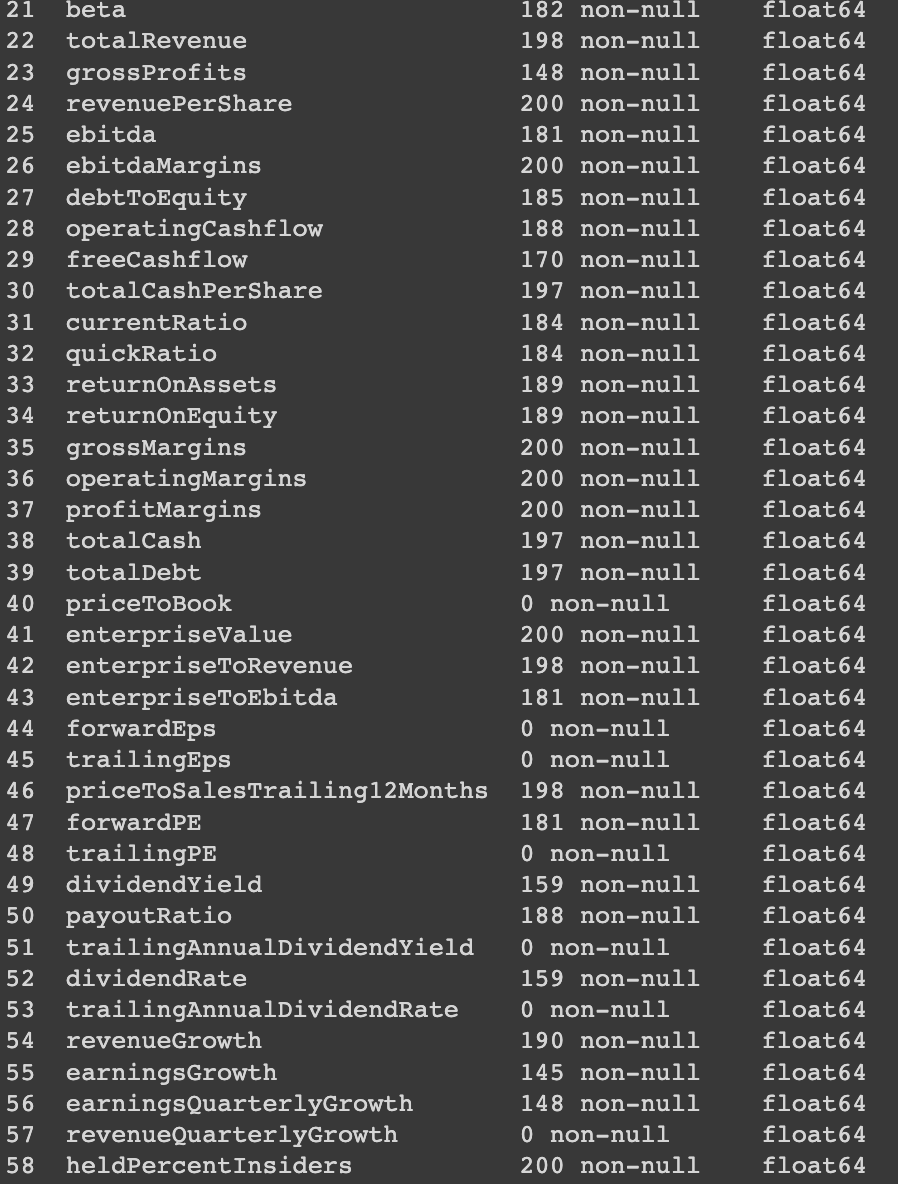

In [ ]:
data[12]

IFRS(연결) Net Quarter                                              \
      IFRS(연결)     2022/03    2022/06    2022/09    2022/12    2023/03   
0          매출액    43423.00   50706.00   76482.00   85375.00   87471.00   
1         영업이익     2589.00    1956.00    5219.00    2374.00    5329.00   
2   영업이익(발표기준)     2589.00    1956.00    5219.00    2374.00    6332.00   
3        당기순이익     2266.00     899.00    1877.00    2756.00    5620.00   
4      지배주주순이익     2266.00     942.00    1857.00    2607.00    5006.00   
5     비지배주주순이익       -0.00     -42.00      20.00     149.00     614.00   
6         자산총계   349759.00  364344.00  398883.00  382994.00  407135.00   
7         부채총계   155363.00  165320.00  187249.00  177057.00  186658.00   
8         자본총계   194396.00  199024.00  211634.00  205938.00  220477.00   
9       지배주주지분   184097.00  185551.00  193227.00  187322.00  196483.00   
10     비지배주주지분    10299.00   13473.00   18407.00   18615.00   23994.00   
11         자본금     1170.00    1170.00    1170.00    1170.00    1170.00   
12        부채비율       79.92      83.07      88.48      85.98      84.66   
13         유보율    15634.75   15759.05   16415.14   15910.44   16693.42   
14       영업이익률        5.96       3.86       6.82       2.78       6.09   
15    지배주주순이익률        5.22       1.86       2.43       3.05       5.72   
16         ROA        3.09       1.01       1.97       2.82       5.69   
17         ROE        6.87       2.04       3.92       5.48      10.43   
18      EPS(원)     1002.00     402.00     794.00    1114.00    2139.00   
19      BPS(원)    78674.00   79295.00   82576.00   80052.00   83967.00   
20      DPS(원)         NaN        NaN        NaN        NaN        NaN   
21         PER         NaN        NaN        NaN        NaN        NaN   
22         PBR        5.62       4.68       5.16       5.44       6.96   
23       발행주식수   234000.00  234000.00  234000.00  234000.00  234000.00   
24       배당수익률         NaN        NaN        NaN        NaN        NaN   

                                     
   2023/06(P) 2023/09(E) 2023/12(E)  
0     87735.0   84160.00   92253.00  
1      4606.0    7155.00    8644.00  
2      4606.0        NaN        NaN  
3      4651.0    6082.00    6609.00  
4      4324.0    4556.00    5536.00  
5         NaN        NaN        NaN  
6         NaN        NaN        NaN  
7         NaN        NaN        NaN  
8         NaN        NaN        NaN  
9         NaN        NaN        NaN  
10        NaN        NaN        NaN  
11        NaN        NaN        NaN  
12        NaN        NaN        NaN  
13        NaN        NaN        NaN  
14        NaN       8.50       9.37  
15        5.3       5.41       6.00  
16        NaN        NaN        NaN  
17        NaN        NaN        NaN  
18     1848.0    1947.00    2366.00  
19        NaN        NaN        NaN  
20        NaN        NaN        NaN  
21        NaN        NaN        NaN  
22        NaN        NaN        NaN  
23        NaN        NaN        NaN  
24        NaN        NaN        NaN

In [ ]:
(data[12].loc[3][5] - data[12].loc[3][1])/data[12].loc[3][1]*100

148.01412180052958

In [ ]:
for idx,code in tqdm(enumerate(df2.Code),total=200):
  html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode=A{code}&cID=&MenuYn=Y&ReportGB=&NewMenuID=11&stkGb=701"
  data = pd.read_html(html)
  df2.loc[idx,'recommendationKey'] = data[7]['투자의견'][0]
  df2.loc[idx,'목표주가'] = data[7]['목표주가'][0]
  df2.loc[idx,'추정EPS'] = data[7]['EPS'][0]
  df2.loc[idx,'추정PER'] = data[7]['PER'][0]

  df2.loc[idx,'beta'] = data[8].loc[8][1]
  df2.loc[idx,'ROE'] = data[8].loc[6][1]
  df2.loc[idx,'동종업계ROE'] = data[8].loc[6][2]
  df2.loc[idx,'enterpriseToEbitda'] = data[8].loc[5][1]
  df2.loc[idx,'동종업계enterpriseToEbitda'] = data[8].loc[5][2]
  df2.loc[idx,'dividendYield'] = data[8].loc[7][1]
  df2.loc[idx,'동종업계dividendYield'] = data[8].loc[7][2]
  df2.loc[idx,'동종업계trailingEps'] = data[8].loc[3][2]
  df2.loc[idx,'trailingPE'] = data[8].loc[4][1]
  df2.loc[idx,'동종업계trailingPE'] = data[8].loc[4][2]

  df2.loc[idx,'5년평균dividendYield'] = np.mean([i for i in data[11].loc[24][1:6].to_list() if i > 0])
  df2.loc[idx,'totalRevenue'] = data[11].loc[0][5]
  df2.loc[idx,'grossProfits'] = data[11].loc[1][5]
  df2.loc[idx,'debtToEquity'] = data[11].loc[7][5]/data[11].loc[8][5]*100
  df2.loc[idx,'returnOnAssets'] = data[11].loc[16][5]
  df2.loc[idx,'returnOnEquity'] = data[11].loc[17][5]
  df2.loc[idx,'totalDebt'] = data[11].loc[7][5]
  df2.loc[idx,'priceToBook'] = data[11].loc[22][5]
  df2.loc[idx,'revenueGrowth'] = (data[11].loc[0][5]-data[11].loc[0][4])/data[11].loc[0][4]*100
  df2.loc[idx,'revenueGrowth'] = (data[11].loc[3][5]-data[11].loc[3][4])/data[11].loc[3][4]*100


  df2.loc[idx,'revenueQuarterlyGrowth'] = (data[12].loc[0][5] - data[12].loc[0][1])/data[12].loc[0][1]*100
  df2.loc[idx,'earningsQuarterlyGrowth'] = (data[12].loc[3][5] - data[12].loc[3][1])/data[12].loc[3][1]*100


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701"
data = pd.read_html(html)

In [ ]:
data[3]

,IFRS 연결,2019/12,2020/12,2021/12,2022/12,2023/03
0,Per Share,Per Share,Per Share,Per Share,Per Share,Per Share
1,EPS계산에 참여한 계정 펼치기(원),3462,3455,4651,4995,1825
2,EBITDAPS계산에 참여한 계정 펼치기(원),6548,6296,8319,9194,2832
3,CFPS계산에 참여한 계정 펼치기(원),5684,5608,6791,7355,2452
4,SPS계산에 참여한 계정 펼치기(원),51149,48555,56330,62616,16478
5,BPS계산에 참여한 계정 펼치기(원),43352,46460,51157,55151,56190
6,Dividends,Dividends,Dividends,Dividends,Dividends,Dividends
7,"DPS(보통주,현금)(원)계산에 참여한 계정 펼치기",450,450,600,750,NaN
8,"DPS(1우선주,현금)(원)계산에 참여한 계정 펼치기",NaN,NaN,NaN,NaN,NaN
9,배당성향(현금)(%)계산에 참여한 계정 펼치기,12,12,12,13,NaN


In [ ]:
data[3].loc[2][4]

'12143'

In [ ]:
for idx,code in tqdm(enumerate(df2.Code),total=200):
  html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode=A{code}&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701"
  data = pd.read_html(html)
  df2.loc[idx,'EBITDAPS'] = data[3].loc[2][4]


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
for idx,code in tqdm(enumerate(df2.Code),total=200):
  html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode=A{code}&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701"
  data = pd.read_html(html)
  if data[3].shape[-1]==22 :
    df2.loc[idx,'freeCashflow'] = data[3].loc[22][4]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
data = pd.read_html(html)

In [ ]:
data[4]

,IFRS(연결),2020/12,2021/12,2022/12,2023/03
0,영업활동으로인한현금흐름,652870.0,651054.0,621813.0,62918.0
1,당기순손익,264078.0,399075.0,556541.0,15746.0
2,법인세비용차감전계속사업이익,NaN,NaN,NaN,NaN
3,현금유출이없는비용등가산계산에 참여한 계정 펼치기,461506.0,527991.0,497297.0,144667.0
4,(현금유입이없는수익등차감)계산에 참여한 계정 펼치기,45321.0,37435.0,166562.0,27586.0
5,영업활동으로인한자산부채변동(운전자본변동)계산에 참여한 계정 펼치기,1224.0,-162869.0,-169989.0,-64405.0
6,*영업에서창출된현금흐름,681488.0,726762.0,717286.0,68422.0
7,기타영업활동으로인한현금흐름계산에 참여한 계정 펼치기,-28618.0,-75708.0,-95472.0,-5504.0
8,투자활동으로인한현금흐름,-536286.0,-330478.0,-316028.0,164715.0
9,투자활동으로인한현금유입액계산에 참여한 계정 펼치기,155517.0,254825.0,274660.0,310152.0


In [ ]:
data[4].loc[21][3]

496807.0

In [ ]:
for idx,code in tqdm(enumerate(df2.Code),total=200):
  html = f"https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A{code}&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701"
  data = pd.read_html(html)
  df2.loc[idx,'operatingCashflow'] = data[4].loc[0][3]
  df2.loc[idx,'totalCash'] = data[4].loc[21][3]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
df2['trailingPE'] = df3['PER']

In [ ]:
df2['dividendYield'] = df3['DIV']

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
html = f"https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701"
data = pd.read_html(html)

In [ ]:
data[1]

,IFRS(연결),2022/03,2022/06,2022/09,2022/12,2023/03
0,성장성비율,성장성비율,성장성비율,성장성비율,성장성비율,성장성비율
1,매출액증가율계산에 참여한 계정 펼치기,19.0,21.3,3.8,-8.0,-18.1
2,영업이익증가율계산에 참여한 계정 펼치기,50.5,12.2,-31.4,-69.0,-95.5
3,EBITDA증가율계산에 참여한 계정 펼치기,38.8,16.5,-16.0,-40.5,-57.2
4,EPS증가율계산에 참여한 계정 펼치기,56.9,15.9,-24.2,120.8,-87.4
5,수익성비율,수익성비율,수익성비율,수익성비율,수익성비율,수익성비율
6,세전계속사업이익률계산에 참여한 계정 펼치기,19.4,18.7,15.4,7.2,2.9
7,영업이익률계산에 참여한 계정 펼치기,18.2,18.3,14.1,6.1,1.0
8,EBITDA마진율계산에 참여한 계정 펼치기,30.7,31.0,27.0,19.8,16.0


In [ ]:
data[1].loc[1][4]

'-8.0'

In [ ]:
df2.totalCash/df2.sharesOutstanding*100000000

0        8322.031655
1       25376.068376
2        7027.506868
3       12515.806334
4      106137.365867
           ...      
195      7200.754417
196       289.062419
197      2367.267073
198      4004.923648
199      2981.392470
Length: 200, dtype: float64

In [ ]:
df2.totalCashPerShare = df2.totalCash/df2.sharesOutstanding*100000000

In [ ]:
for idx,code in tqdm(enumerate(df2.Code),total=200):
  html = f"https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A{code}&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701"
  data = pd.read_html(html)
  df2.loc[idx,'earningsGrowth'] = data[1].loc[1][4]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
df2.to_csv('전처리중2.csv',index=False)

In [ ]:
df2[df2['동종업계trailingPE'].isnull()]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정EPS,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS
23,015760,한국전력,KOSPI,3.7,641964032.0,1023550.0,1335802.0,0.45552,2.37,0.000049,...,-10269.0,-1.9,-46.90,-33.85,NaN,0.27,-28238.01,NaN,4.44,-31456
108,036460,한국가스공사,KOSPI,4.0,85827000.0,213460.0,258135.0,0.12054,5.08,0.000110,...,5782,4.6,15.67,-33.85,NaN,0.27,-28238.01,NaN,3.60,45657


In [ ]:
df2.marketCap/df2.totalRevenue

0      1.497359e+08
1      5.205140e+08
2      1.887445e+08
3      1.901894e+09
4      5.353848e+07
           ...     
195    4.603727e+07
196    2.751838e+07
197    2.347624e+07
198    5.536609e+07
199    2.819209e+07
Length: 200, dtype: float64

In [ ]:
df2.trailingPE

0        8.55
1      167.27
2       36.55
3       69.74
4       14.40
        ...  
195     15.92
196     19.68
197      5.62
198      4.37
199      3.45
Name: trailingPE, Length: 200, dtype: float64

In [ ]:
df2.EBITDAPS.astype(float)*df2.sharesOutstanding

0      7.249104e+13
1      3.082248e+12
2      2.039098e+13
3      1.312591e+12
4      7.516828e+12
           ...     
195    1.084024e+11
196    1.006450e+11
197    1.678934e+11
198    2.008150e+11
199    2.019885e+11
Length: 200, dtype: float64

In [ ]:
df2.ebitda

0      5.310413e+13
1      3.306611e+12
2      1.427266e+13
3      1.365613e+12
4      7.045387e+12
           ...     
195    9.055083e+10
196    1.017226e+11
197    1.543942e+11
198    1.945833e+11
199    2.230346e+11
Name: ebitda, Length: 200, dtype: float64

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정EPS,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS
0,5930,삼성전자,KOSPI,buy,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,1504.0,45.2,17.07,12.95,5.49,1.74,27936.99,9.59,2.870,12143
1,373220,LG에너지솔루션,KOSPI,buy,2.340000e+08,462840.0,383132.0,0.09387,17.29,0.000359,...,8013.0,69.4,5.75,12.95,5.49,1.74,27936.99,9.59,NaN,13172
2,660,SK하이닉스,KOSPI,buy,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,-10753.0,-11.0,3.56,12.95,5.49,1.74,27936.99,9.59,1.462,28792
3,207940,삼성바이오로직스,KOSPI,buy,7.117400e+07,107980.0,64364.0,0.14091,3.35,0.000023,...,11163.0,71.8,11.42,8.16,28.47,0.26,6242.01,48.89,NaN,18442
4,5490,POSCO홀딩스,KOSPI,buy,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,37348.0,16.0,6.11,7.69,4.67,3.45,11392.07,6.29,4.364,99067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13890,지누스,KOSPI,buy,1.834530e+07,56730.0,46906.0,0.17710,15.61,0.000191,...,1180,24.7,5.32,9.89,6.68,1.88,12256.92,10.91,1.185,5909
196,381970,케이카,KOSPI,buy,4.808650e+07,135983.0,257546.0,0.11685,1.84,0.000080,...,881,14.1,11.65,6.36,7.09,2.41,6625.56,10.13,4.390,2093
197,57050,현대홈쇼핑,KOSPI,buy,1.144780e+07,16129.0,13533.0,0.28244,8.74,0.000126,...,11875,3.6,4.49,6.36,7.09,2.41,6625.56,10.13,3.142,14666
198,284740,쿠쿠홈시스,KOSPI,buy,2.242240e+07,15804.0,20270.0,0.10643,5.28,0.000028,...,관련 데이터가 없습니다.,관련 데이터가 없습니다.,17.66,5.75,10.61,0.93,7358.71,26.73,1.690,8956


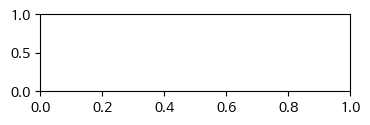

In [ ]:
tmp = pd.read_csv('/content/merged_data.csv')
tmp

In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    int64  
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float64
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
tmp['5년평균dividendYield'] = tmp['5년평균dividendYield'].fillna(0)

In [ ]:
df2.beta

0      0.95
1      0.99
2      1.17
3      0.67
4      1.01
       ... 
195    1.36
196    1.24
197    0.71
198    0.85
199    1.12
Name: beta, Length: 200, dtype: float64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
df2 = df2.drop(columns=['ebitda'])

In [ ]:
df2.currentRatio = tmp.currentRatio

In [ ]:
df2.quickRatio = tmp.quickRatio

In [ ]:
df2['5년평균dividendYield'] = tmp['5년평균dividendYield']

In [ ]:
df2['EBITDAPS']= df2['EBITDAPS'].astype(float)

In [ ]:
df2.EBITDAPS.astype(float)*df2.sharesOutstanding # ebidta

0      7.249104e+13
1      3.082248e+12
2      2.039098e+13
3      1.312591e+12
4      7.516828e+12
           ...     
195    1.084024e+11
196    1.006450e+11
197    1.678934e+11
198    2.008150e+11
199    2.019885e+11
Length: 200, dtype: float64

In [ ]:
df2.enterpriseValue/df2.EBITDAPS.astype(float)*df2.sharesOutstanding # ev/ebidta

0      1.840119e+20
1      2.402818e+18
2      2.611041e+18
3      2.158312e+17
4      4.565783e+16
           ...     
195    1.909489e+15
196    1.652466e+16
197    1.247252e+14
198    1.406058e+15
199    8.993432e+14
Length: 200, dtype: float64

In [ ]:
df2[df2.enterpriseToEbitda.isnull()].index

Int64Index([ 14,  16,  20,  22,  23,  24,  26,  27,  33,  34,  41,  43,  45,
             48,  52,  62,  74,  78,  84,  85,  89,  96,  98, 109, 117, 120,
            135, 157, 164, 172, 177, 178, 186],
           dtype='int64')

In [ ]:
for idx in df2[df2.enterpriseToEbitda.isnull()].index:
  df2.loc[idx,'enterpriseToEbitda'] = (df2.enterpriseValue/df2.EBITDAPS.astype(float)*df2.sharesOutstanding)[idx]

In [ ]:
df2[df2.enterpriseToRevenue.isnull()]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정EPS,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS
42,030200,KT,KOSPI,4.0,246418000.0,1034230.0,941773.0,0.33318,0.48,0.000018,...,4742.0,6.7,7.99,7.85,3.50,6.20,3900.22,8.65,6.650000,20684.0
82,035250,강원랜드,KOSPI,4.0,202739008.0,741364.0,653418.0,0.16694,1.52,0.000031,...,1444,11.6,3.47,5.75,10.61,0.93,7358.71,26.73,2.453333,1382.0


In [ ]:
df2.enterpriseValue/df2.totalRevenue

0      1.238437e+08
1      5.283730e+08
2      2.378888e+08
3      1.863337e+09
4      7.033928e+07
           ...     
195    5.303934e+07
196    3.303393e+07
197    7.602794e+06
198    5.986683e+07
199    2.440434e+07
Length: 200, dtype: float64

In [ ]:
for idx in df2[df2.enterpriseToRevenue.isnull()].index:
  df2.loc[idx,'enterpriseToRevenue'] = (df2.enterpriseValue/df2.totalRevenue)[idx]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    object 
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float32
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
info = ['목표주가','recommendationKey','추정EPS','추정PER','동종업계ROE','동종업계enterpriseToEbitda','동종업계dividendYield','동종업계trailingEps','동종업계trailingPE']
trading = ['sharesOutstanding','averageVolume10days','averageVolume','heldPercentInstitutions','shortRatio','sharesPercentSharesOut']
price = ['marketCap','currentPrice','fiftyDayAverage','twoHundredDayAverage','52WeekChange','ytdReturn','fiveYearAverageReturn','beta']
performance = ['totalRevenue','grossProfits','revenuePerShare','ebitdaMargins','EBITDAPS']
finance = ['debtToEquity','operatingCashflow','freeCashflow','totalCashPerShare','currentRatio','quickRatio','totalCash','totalDebt','BPS']
business = ['returnOnAssets','returnOnEquity','grossMargins','operatingMargins','profitMargins']
value = ['priceToBook','enterpriseValue','enterpriseToRevenue','enterpriseToEbitda','trailingEps','priceToSalesTrailing12Months','trailingPE']
dividend = ['dividendYield','dividendRate','5년평균dividendYield']
growth = ['revenueGrowth','earningsGrowth','earningsQuarterlyGrowth','revenueQuarterlyGrowth','heldPercentInsiders']

In [ ]:
df2[performance]

,totalRevenue,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS
0,3022314.0,433766.0,39878.170,0.19595,12143.0
1,255986.0,12137.0,128204.680,0.11021,13172.0
2,446216.0,68094.0,54607.414,0.38006,28792.0
3,30013.0,9836.0,45224.754,0.42530,18442.0
4,847502.0,48501.0,1091541.100,0.08510,99067.0
...,...,...,...,...,...
195,11596.0,656.0,60615.234,0.08247,5909.0
196,21773.0,500.0,44447.390,0.04759,2093.0
197,21017.0,1106.0,182193.530,0.07402,14666.0
198,9381.0,1199.0,41923.742,0.20700,8956.0


In [ ]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,random_state=42,n_init='auto')
kmeans.fit(df2[performance])

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(2,20):
    print(f"{i}개로 군집화")
    kmeans= KMeans(n_clusters=i,random_state=42,n_init='auto')
    kmeans.fit(df2[performance])
    print(f"silhouette_score : {silhouette_score(df2[performance],kmeans.labels_)}")

2개로 군집화
silhouette_score : 0.8139705786670782
3개로 군집화
silhouette_score : 0.7189166633809058
4개로 군집화
silhouette_score : 0.7113262544435298
5개로 군집화
silhouette_score : 0.579346653318087
6개로 군집화
silhouette_score : 0.5855215945751834
7개로 군집화
silhouette_score : 0.4713670088081057
8개로 군집화
silhouette_score : 0.5700885331824366
9개로 군집화
silhouette_score : 0.5459384307041611
10개로 군집화
silhouette_score : 0.5487321033404643
11개로 군집화
silhouette_score : 0.5643436852871399
12개로 군집화
silhouette_score : 0.5205317896043336
13개로 군집화
silhouette_score : 0.4979032202231716
14개로 군집화
silhouette_score : 0.495089215851815
15개로 군집화
silhouette_score : 0.4779610759436531
16개로 군집화
silhouette_score : 0.4742773093408039
17개로 군집화
silhouette_score : 0.44893820762612763
18개로 군집화
silhouette_score : 0.45466608642044604
19개로 군집화
silhouette_score : 0.4465869227893849


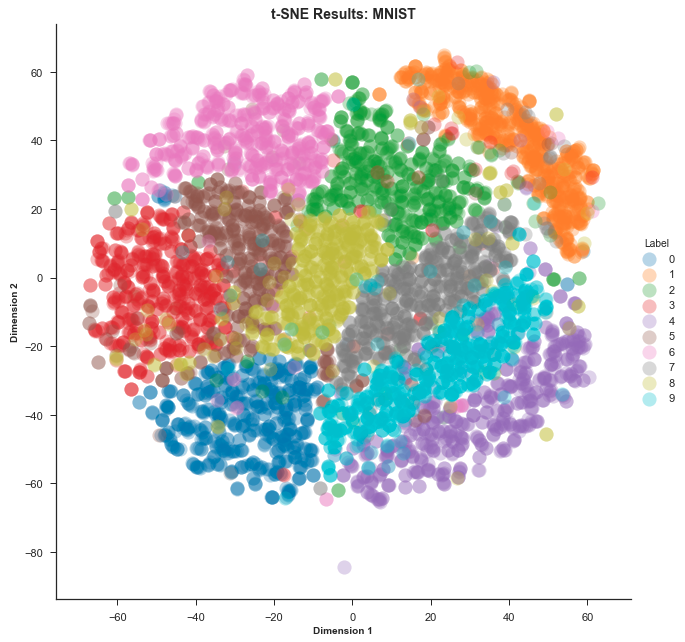

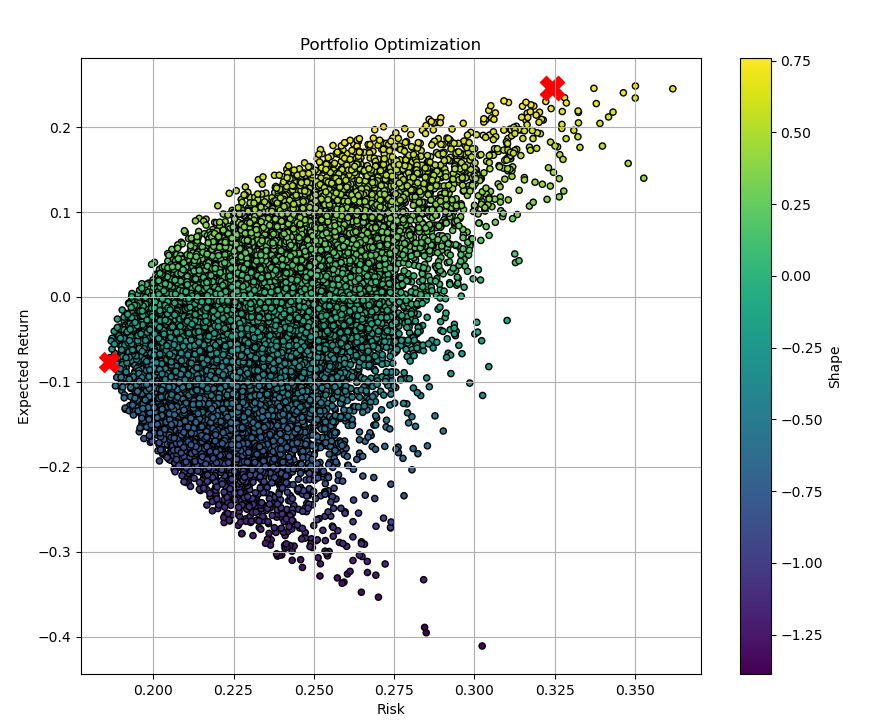

In [ ]:
pd.read_csv('/content/cashflow.csv')['freeCashflow'][0]

-13494864838656.0

In [ ]:
for idx in df2[df2.freeCashflow.isnull()].index:
  df2.loc[idx,'freeCashflow'] = pd.read_csv('/content/cashflow.csv')['freeCashflow'][idx]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    int64  
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float64
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
df2[df2.fiveYearAverageReturn.isnull()]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정EPS,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS
23,15760,한국전력,KOSPI,3.7,641964032.0,1023550.0,1335802.0,0.45552,2.37,0.000049,...,-10269.0,-1.9,-46.90,-33.85,NaN,0.27,-28238.01,NaN,4.440,-31456.0
52,377300,카카오페이,KOSPI,3.4,133905000.0,435214.0,286532.0,0.08385,6.11,0.000089,...,142,346.3,3.08,8.42,3.05,4.32,4652.33,5.53,0.000,-48.0
75,383220,F&F,KOSPI,4.0,38142700.0,144558.0,149078.0,0.17580,3.16,0.000081,...,12639,8.6,60.40,13.18,6.43,1.71,6809.81,9.03,0.845,15799.0
105,7070,GS리테일,KOSPI,4.0,102180000.0,473586.0,304640.0,0.16225,6.78,0.000841,...,2076,11.8,1.00,6.36,7.09,2.41,6625.56,10.13,2.320,8985.0
112,1040,CJ,KOSPI,3.9,27058500.0,135079.0,136912.0,0.11788,19.51,0.001027,...,8925,8.8,3.94,8.42,3.05,4.32,4652.33,5.53,2.562,150350.0
115,12750,에스원,KOSPI,3.8,33810200.0,104897.0,123937.0,0.30879,2.20,0.000032,...,4331,12.8,10.18,5.75,10.61,0.93,7358.71,26.73,1.142,9877.0
147,137310,에스디바이오센서,KOSPI,3.0,102322000.0,5020837.0,1380008.0,0.05693,12.92,0.003355,...,-2619,-5.0,35.30,26.44,3.56,2.22,55236.31,4.44,2.770,11481.0
154,375500,DL이앤씨,KOSPI,3.8,37706400.0,178811.0,173531.0,0.30700,9.81,0.000420,...,7069,4.4,9.70,6.96,5.83,2.79,2065.28,6.59,2.615,14290.0
168,210,DL,KOSPI,4.0,20930700.0,91933.0,82060.0,0.23111,4.81,0.000186,...,-2252,-17.9,1.87,8.02,7.44,2.25,9097.35,11.99,0.832,28757.0
183,271940,일진하이솔루스,KOSPI,4.0,36313200.0,67546.0,89928.0,0.03241,11.41,0.000121,...,209,122.0,2.27,6.82,7.88,2.74,7323.79,9.26,0.000,226.0


In [ ]:
tmp

,티커,Name,등락률_x,등락률_y,등락률_x,등락률_y,등락률
0,005930,삼성전자,24.59,-29.37,-3.33,45.16,44.19
1,373220,LG에너지솔루션,26.98,NaN,NaN,NaN,NaN
2,000660,SK하이닉스,58.00,-42.75,10.55,25.93,55.54
3,207940,삼성바이오로직스,-2.80,-8.00,9.32,90.76,12.03
4,005490,POSCO홀딩스,115.91,0.73,0.92,15.01,-2.67
...,...,...,...,...,...,...,...
195,013890,지누스,-24.57,-50.24,-17.95,10.99,NaN
196,381970,케이카,7.53,-66.13,NaN,NaN,NaN
197,057050,현대홈쇼핑,-21.34,-14.98,-22.21,1.24,-18.69
198,284740,쿠쿠홈시스,-23.98,-25.00,0.26,-9.49,21.69


In [ ]:
tmp.loc[1][4] > 0

False

In [ ]:
tmp.loc[1][2] >0

True

In [ ]:
lst2 = []
for v in tmp.values :
  lst = []
  for i in v[2:]:
    if i > 0 or i < 0 :
      lst.append(i)
  lst2.append(np.mean(lst))

In [ ]:
df2['fiveYearAverageReturn'] = lst2

In [ ]:
pd.read_csv("/content/final_merge.csv")

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정EPS,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS
0,5930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,1504.0,45.2,17.07,12.95,5.49,1.74,27936.99,9.59,2.870,12143
1,373220,LG에너지솔루션,KOSPI,4.0,2.340000e+08,462840.0,383132.0,0.09387,17.29,0.000359,...,8013.0,69.4,5.75,12.95,5.49,1.74,27936.99,9.59,NaN,13172
2,660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,-10753.0,-11.0,3.56,12.95,5.49,1.74,27936.99,9.59,1.462,28792
3,207940,삼성바이오로직스,KOSPI,4.0,7.117400e+07,107980.0,64364.0,0.14091,3.35,0.000023,...,11163.0,71.8,11.42,8.16,28.47,0.26,6242.01,48.89,NaN,18442
4,5490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,37348.0,16.0,6.11,7.69,4.67,3.45,11392.07,6.29,4.364,99067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13890,지누스,KOSPI,4.0,1.834530e+07,56730.0,46906.0,0.17710,15.61,0.000191,...,1180,24.7,5.32,9.89,6.68,1.88,12256.92,10.91,1.185,5909
196,381970,케이카,KOSPI,4.0,4.808650e+07,135983.0,257546.0,0.11685,1.84,0.000080,...,881,14.1,11.65,6.36,7.09,2.41,6625.56,10.13,4.390,2093
197,57050,현대홈쇼핑,KOSPI,4.0,1.144780e+07,16129.0,13533.0,0.28244,8.74,0.000126,...,11875,3.6,4.49,6.36,7.09,2.41,6625.56,10.13,3.142,14666
198,284740,쿠쿠홈시스,KOSPI,관련 데이터가 없습니다.,2.242240e+07,15804.0,20270.0,0.10643,5.28,0.000028,...,관련 데이터가 없습니다.,관련 데이터가 없습니다.,17.66,5.75,10.61,0.93,7358.71,26.73,1.690,8956


In [ ]:
for idx in df2[df2.revenueQuarterlyGrowth.isnull()].index:
  df2.loc[idx,'revenueQuarterlyGrowth'] = pd.read_csv("/content/final_merge.csv")['revenueQuarterlyGrowth'][idx]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          200 non-null    int64  
 1   Name                          200 non-null    object 
 2   Market                        200 non-null    object 
 3   recommendationKey             200 non-null    object 
 4   sharesOutstanding             200 non-null    float64
 5   averageVolume10days           200 non-null    float64
 6   averageVolume                 200 non-null    float64
 7   heldPercentInstitutions       200 non-null    float64
 8   shortRatio                    200 non-null    float64
 9   sharesPercentSharesOut        200 non-null    float64
 10  marketCap                     200 non-null    float64
 11  currentPrice                  200 non-null    float64
 12  fiftyDayAverage               200 non-null    float64
 13  twoHu

In [ ]:
df2.to_csv("preprocessing_final.csv",index = False)

In [ ]:
df2=pd.read_csv("전처리Final.csv")